In [46]:
#importing dependencies here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# reading the dataset
personality_data = pd.read_csv("data/mbti_1.csv")

In [48]:
# lookign at the top 5 rows of the dataset
personality_data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [49]:
# checking the number of rows and columns
personality_data.shape

(8675, 2)

#### Checking for Null values

In [50]:
# checking for missing values
personality_data.isnull().sum()

type     0
posts    0
dtype: int64

Luckily there are no missing values present in this dataset.

#### Checking for Class Imbalance

In [51]:
# checking number of records for each of the 16 personality types
personality_data["type"].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

The dataset seems to be Imbalanced.

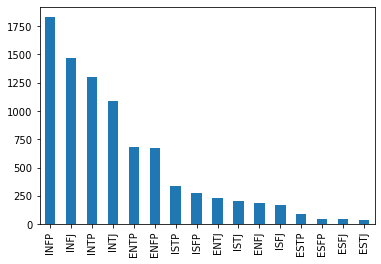

In [52]:
# visually showing the class imbalance
personality_data["type"].value_counts().plot(kind="bar")

In [53]:
# fixing the class imbalance but converting 16 classes into 4 more balanced classes
personality_data['is_Extrovert'] = personality_data['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
personality_data['is_Sensing'] = personality_data['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
personality_data['is_Thinking'] = personality_data['type'].apply(lambda x: 1 if x[2] == 'T' else 0)
personality_data['is_Judging'] = personality_data['type'].apply(lambda x: 1 if x[3] == 'J' else 0)
personality_data.head()

,type,posts,is_Extrovert,is_Sensing,is_Thinking,is_Judging
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,0,0,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,1,0,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,0,0,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",0,0,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,1,0,1,1


In [56]:
# checking individual counts
introvert_count = personality_data["is_Extrovert"].value_counts()[0]
extrovert_count = personality_data["is_Extrovert"].value_counts()[1]

intuition_count = personality_data["is_Sensing"].value_counts()[0]
sensing_count = personality_data["is_Sensing"].value_counts()[1]

feeling_count = personality_data["is_Thinking"].value_counts()[0]
thinking_count = personality_data["is_Thinking"].value_counts()[1]

perceiving_count = personality_data["is_Judging"].value_counts()[0]
judging_count = personality_data["is_Judging"].value_counts()[1]

In [57]:
# printing all the counts
print(f"Introvert Count: {introvert_count}")
print(f"Extrovert Count: {extrovert_count}")
print(f"Intuition Count: {intuition_count}")
print(f"Sensing Count: {sensing_count}")
print(f"Feeling Count: {feeling_count}")
print(f"Thinking Count: {thinking_count}")
print(f"Perceiving Count: {perceiving_count}")
print(f"Judging Count: {judging_count}")

Introvert Count: 6676
Extrovert Count: 1999
Intuition Count: 7478
Sensing Count: 1197
Feeling Count: 4694
Thinking Count: 3981
Perceiving Count: 5241
Judging Count: 3434


The class imbalance issue still seem to exist but the data now looks much better than the minority class counts of previous data.

#### Checking for presence of correlations

In [81]:
corr = personality_data[["is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging"]].corr()
corr.style.background_gradient(cmap='BrBG').set_precision(4)

,is_Extrovert,is_Sensing,is_Thinking,is_Judging
is_Extrovert,1.0000,-0.0459,0.0696,-0.1619
is_Sensing,-0.0459,1.0000,0.0810,-0.0149
is_Thinking,0.0696,0.0810,1.0000,-0.0047
is_Judging,-0.1619,-0.0149,-0.0047,1.0000


There does not seem to be any strong correlation between the four personality dimenions.